# Assignment 02: Scikit Learn Basic Regression and Classification

**Due Date:** Friday 9/18/2020 (by 5 pm)


## Introduction 

In this exercise we will be performing a regression and classification task using the Scikit learn framework, and the Python statsmodel library.  You should work through the tutorial on using scikit-learn and statsmodel before doing this assignment, as well as work on the materials from our units on regression and classification tasks.

For the first part of this assignment, I recommend looking through the following tutorials on using
Scikit Learn and the statsmodel library for linear regression:

[A Beginners guide to Linear Regression in Python with Scikit-Learn](https://medium.com/analytics-vidhya/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-6b0fe70b32d7)


[Use statsmodels to Perform Linear Regression in Python](https://datatofish.com/statsmodels-linear-regression/)

I am using this material as a reference for the first part of this assignment.

**Please fill these in before submitting, just in case I accidentally mix up file names while grading**:

Name: Prashanth Garlapati

CWID-5: 98970

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# By convention, we often just import the specific classes/functions
# from scikit-learn we will need to train a model and perform prediction.
# Here we include all of the classes and functions you should need for this
# assignment from the sklearn library, but there could be other methods you might
# want to try or would be useful to the way you approach the problem, so feel free
# to import others you might need or want to try
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

# statsmodels has an api, it is often imported as sm by convention
import statsmodels.api as sm

%matplotlib inline

In [9]:
plt.rcParams['figure.figsize'] = (10, 8) # set default figure size, 8in by 6in

## Linear Regression with One Variable
--------


### Scikit-Learn LinearRegression model

Load and plot the profit data of 1 feature from the file named "../data/assg-02-profit-data.csv" using Pandas to load in the
csv file.  Plot using a basic matplotlib figure the points in the dataset. This data set has profit (y or dependent
variable) for a food truck business, specified in 10's of $1000. 
The profit is the variable we want to predict (the regression variable).
Profit is a function of the population size (x or independent variable),
which here is expressed in 10000s people (e.g. pupulation 10 = 100,000 people).

In [10]:
# load the assignment 02 housing price linear regression data here
df = pd.read_csv("../data/assg-02-profit-data.csv")
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


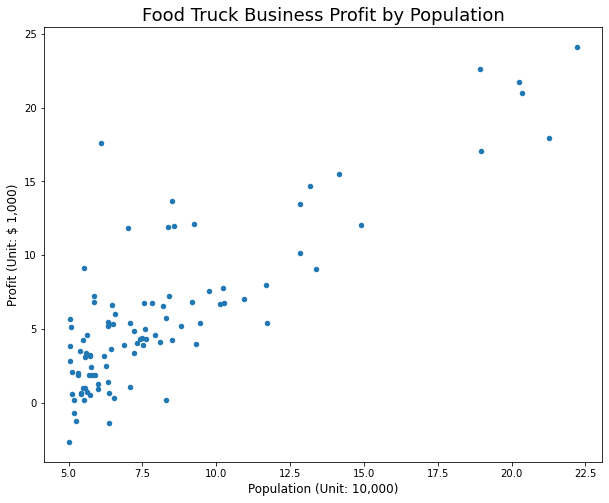

In [11]:
# plot the data here, matplotlib example
df.plot(kind = 'scatter', x = 'population', y = 'profit')
plt.title('Food Truck Business Profit by Population', fontsize = 18)
plt.xlabel('Population (Unit: 10,000)', fontsize = 12)
plt.ylabel('Profit (Unit: $ 1,000)', fontsize = 12)
plt.show()

The tutorial shows an example of actually building a regression model where data is held back from the training
so that we can evaluate the accuracy of our predictive model.  We will try that next.  First of all,
fit a linear regression model to all of the data using the scikit-learn `LinearRegression` object.

Once you fit the model, show what the slope and intercept (e.g. the fitted parameters
of the model) were that were determined to be the
best fit model parameters (intercept and coefficients of the model).  Also use the score function
to display the $R^2$ score of the fitted model.

In [12]:
X = df['population'].values.reshape(-1,1)

y = df['profit'].values

In [13]:
# fit the linear regression model to all of the data
linearregressor = LinearRegression()

linearregressor.fit(X,y)

LinearRegression()

In [14]:
# retrieve the intercept and slope
print("Intercept is :" , linearregressor.intercept_)
print("Slope is :", linearregressor.coef_)

Intercept is : -3.89578087831185
Slope is : [1.19303364]


In [15]:
# use the score() function to display the models R^2 fit
print("Score is : ", linearregressor.score(X,y))

Score is :  0.7020315537841397


You should compare your intercept and slope you determine here using Scikit Learn with the following.

The slope and intercept fitted parameters you should find are:

intercept: -3.89578088

slope: 1.19303364

As shown in the our lecture notebooks, use the predict() method of your Scikit Learn regression model to predict
each value of our x data features

In [16]:
# using predict() from scikit-learn find the predicted or hypothesized profit for each of the model populations
predicted = linearregressor.predict(X)

Now we can plot the determined linear fit line given by Scikit Learn to our data

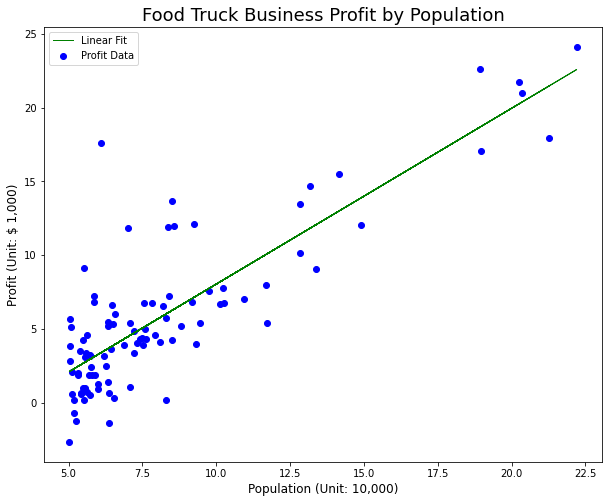

In [17]:
# plot the fitted line using the predict() method from the LinearRegression object
plt.scatter(X, y, color = 'blue', label = 'Profit Data')
plt.plot(X, predicted, color = 'green', linewidth = 1, label = 'Linear Fit')
plt.title('Food Truck Business Profit by Population', fontsize = 18)
plt.xlabel('Population (Unit: 10,000)', fontsize = 12)
plt.ylabel('Profit (Unit: $ 1,000)', fontsize = 12)
plt.legend()
plt.show()

### statsmodels Linear Regression

In contrast to the scikit-learn library, the python statsmodel library is primarily geared towards doing statistical
analysis of data, similar to a stats package like using SPSS or R.  You can perform a linear regression on a data
set using the statsmodel package, and get much more information about the goodness of the fit from the
constructed model.

In the next cell, create a model using statsmodels OLS (ordinary least squared fit) function, fit the model, and use the summary() function
to get information about the fit.

In [18]:
# load the data from our assignment 02 linear regression problem again if needed
# copying the data from df since there is no change.
df_stats = df.copy()

X = df_stats['population'].values.reshape(-1, 1)
y = df_stats['profit'].values.reshape(-1, 1)

When building a model of data, like a linear regression model, there are terms or parameters that the model
fits to the data.   One of these terms is known as the **bias** term.  We will learn more about what this 
term is in the coming weeks.  

The Scikit-learn library assumes you have not represented the bias term in the `X` data that is being fit.
But the statsmodel library does not make this assumption.  So there is actually an additional step you
need to perform before fitting, which is to add in the constant bias term to the `X` data being fit.

In [19]:
# unlike for sklearn library, we actually have to add the dummy feature by hand to 
# represent the intercept feature, it is not assumed automatically by OLS
# use the add_constant() method to add a column to represent our intercept coefficient in the model.
X = sm.add_constant(X)

In [20]:
# use the statsmodels summary method to get a summary of the statistical fit of your linear regression.
# Check the fitted parameters to the results from scikit-learn before.
ols = sm.OLS(y, X)
model = ols.fit()
model.params

array([-3.89578088,  1.19303364])

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           1.02e-26
Time:                        22:29:18   Log-Likelihood:                -243.95
No. Observations:                  97   AIC:                             491.9
Df Residuals:                      95   BIC:                             497.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8958      0.719     -5.415      0.000      -5.324      -2.467
x1             1.1930      0.080     14.961      0.000       1.035       1.351
==============================================================================
Omnibus:                       39.986   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.142
Skew:                           1.455   Prob(JB):                     3.29e-24
Kurtosis:                       7.276   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the summary you should note that you get the same coefficients (const and x1) as we have determined using 
scikit-learn previously.  The $R^2$ measure of the fit is also the same
as what we got for fitting all of the data for the sklearn model.  

The rest of the summary information are some statistical information about how well the model fits
the data.  The data in the table under the [0.025 0.975] columns give a 95% confidence interval for
the coefficients.  For example from the measure of the noise and fit we are 95% confident that the true
coefficient for the x1 parameter (the slope of the line) is somewhere between 1.035 and 1.351.  The P>|t| measure is also
important here.  This is a P-value that measure how surprised we would be to see this fit if there was
actually no linear relationship between the independent variable and the dependent variable.  Both of these
measures are basically 0, which means we would be very surprised to see this fit if there was no linear
relationship between the features and the dependent variable.  When the P value here is large (usually
a cutoff of 0.05 is used), then that means we are not so surprised to see the result if there was no
linear relationship.


## Logistic Regression for a Binary Classifier
------

### scikit-learn LogisticRegression model

Load and plot the exam score data with binary class labels of accepted/not accepted.
This data is found in a file named "../data/assg-02-exam-data.csv". Plot the data using
a standard Matplotlib scatter plot to visualize it.  This data set has 2 exam scores (exam1 and exam2),
for a number of students, and a binary category for each student of whether they were admitted
or not to a university degree program.

[Logistic Regression using Python (scikit-learn)](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)

[Logistic Regression in Python Using statsmodels](http://blog.yhat.com/posts/logistic-regression-python-rodeo.html)

In [22]:
# load the data for the logistic classification problem here
df_score = pd.read_csv('../data/assg-02-exam-data.csv', names=["exam1", "exam2", "admission"])
print(df_score.shape)
df_score.info()
df_score.describe()

(100, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   exam1      100 non-null    float64
 1   exam2      100 non-null    float64
 2   admission  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


,exam1,exam2,admission
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


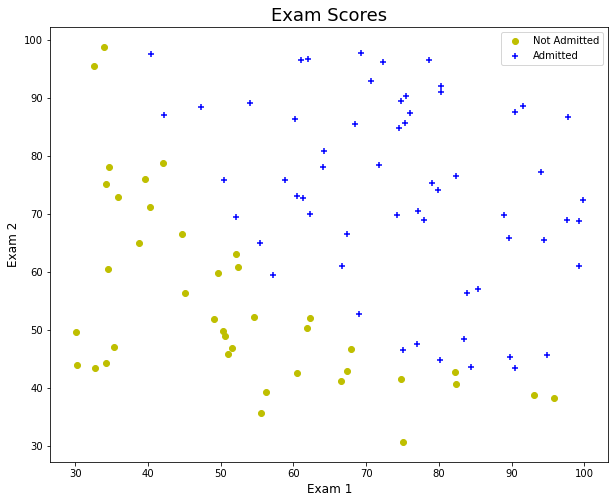

In [28]:
# replot the exam1/exam2 data indicating the binary categories using marker type again here for reference
fig = plt.figure()
ax = fig.add_subplot()

# plot not admitted students first
ax.scatter(df_score.exam1[df_score.admission == 0], df_score.exam2[df_score.admission == 0], c='y', marker ='o', label = 'Not Admitted')

# plot the admitted students
ax.scatter(df_score.exam1[df_score.admission == 1], df_score.exam2[df_score.admission == 1], c='b', marker ='+', label = 'Admitted')

plt.title('Exam Scores', fontsize = 18)
plt.xlabel('Exam 1', fontsize = 12)
plt.ylabel('Exam 2', fontsize = 12)
plt.legend()
plt.show()

Now we will use Scikit Learn to fit a model again, but of course we will fit a binary logistic regression classifier
to our data to find the best decision boundary between the two classes.

In the next cell, create the Scikit Learn logistic regression model and fit it to our data.

In [29]:
X = df_score[['exam1', 'exam2']]
y = df_score['admission']

# train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 0)

# Create the scikit-learn LogisticRegression instance here
model = LogisticRegression()
# and fit your model to the college acceptance using exam scores data here
model.fit(X, y)

LogisticRegression()

For a binary classifier with 2 features like this, there are 3 parameters in the model,
the intercept, and the parameters for exam1 and exam2 that were fit to define the decision boundary.

You should get close to the following parameters, where the first
parameter is the intercept, and the second and third are the theta parameters fit for the exam1 and exam2
feature respectively:

[-25.05219314   0.20535491   0.2005838 ]

In the model returned by Scikit Learn, the intercept_ should correspond and match the intercept value,
and the coef_ should match the exam1 and exam2 coefficient parameters.

In [30]:
# display the intercept and the model coefficients for the exam1 and exam2 feature here
W, b = model.coef_, model.intercept_

print("coefficients for the exam1 and exam2:", W)
print("intercept:", b)

coefficients for the exam1 and exam2: [[0.20535491 0.2005838 ]]
intercept: [-25.05219314]


The parameters in this case might not exactly match because of the differences in the optimization meta-parameters, but
they will be close and essentially form almost the same decision boundary.

As we did in the example lectures this week, for a 2 parameter set of data we can use the intercept and coefficients to
visualize the decision boundary specified by the fitted logistic regression model.

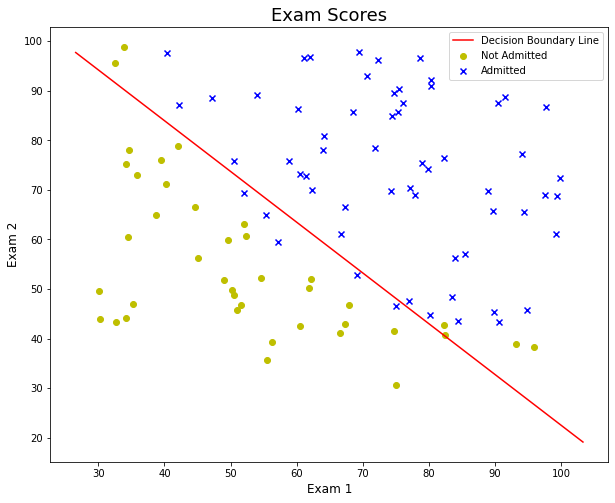

In [32]:
# plot the decision boundary line found by the scikit-learn logistic classification
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(df_score.exam1[df_score.admission == 0], df_score.exam2[df_score.admission == 0], c='y', marker ='o', label = 'Not Admitted')
ax1.scatter(df_score.exam1[df_score.admission == 1], df_score.exam2[df_score.admission == 1], c='b', marker ='x', label = 'Admitted')
plt.title('Exam Scores', fontsize = 18)
plt.xlabel('Exam 1', fontsize = 12)
plt.ylabel('Exam 2', fontsize = 12)
ax2 = plt.gca()
xvals = np.array(ax2.get_xlim())
yvals = -(xvals * W[0][0] + b)/W[0][1]
plt.plot(xvals, yvals, color ='r', label = 'Decision Boundary Line')
plt.legend()
plt.show()


Then finally, as we showed in our lecture materials from chapter 3, calculate the confusion matrix results of your trained classifier
on the training data.  Also plot the precision and recall scores, using either two separate lines, one for each, or plot the precision vs. recall against
one another.  We showed both in our lecture and textbook readings for this week.

accuracy: 0.89
confusion matrix:
[[34  6]
 [ 5 55]]


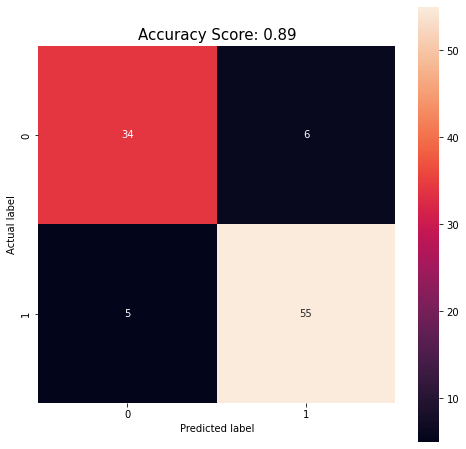

In [33]:
from sklearn.metrics import confusion_matrix

# calculate predictions for the x inputs
predict = model.predict(X)
lg_score = model.score(X, y)
print('accuracy:', lg_score)

# display the confusion matrix
cf_matrix = confusion_matrix(y, predict)
print("confusion matrix:")
print(cf_matrix)

# plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cf_matrix, annot=True, fmt=".0f", square=True)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: %0.2f' % lg_score
plt.title(title, size=15);


In [34]:

# get the decision scores
y_score = model.decision_function(X)

# calculate precision and recall 
precisions, recalls, thresholds = precision_recall_curve(y, y_score)

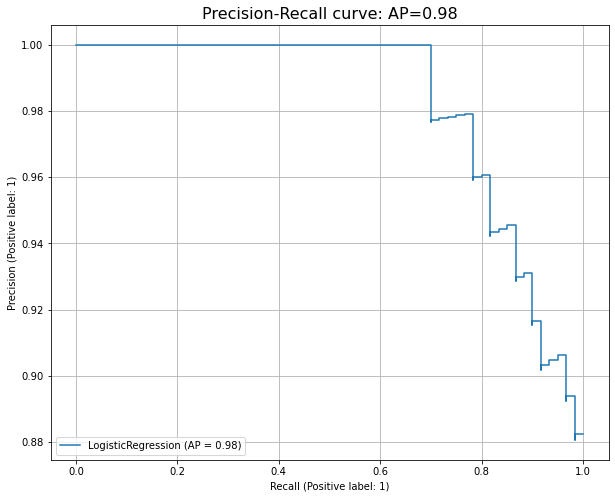

In [35]:
# plot precision and recall curves
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y, y_score)
p_c = plot_precision_recall_curve(model, X, y)
p_c.ax_.set_title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision), size = 16)
plt.grid(True)

### statsmodels Logistic Regression

Likewise use the statsmodels library to redo the Logistic Regression classification of the adming/not admit
data set once again.  In the following cells, load the data, add in the constant column needed by statsmodels
to fit the model using the intercept parameter, then create an instance and fit the model, and show a summary
of your logistic regression results.

In [ ]:
# get fresh reload of the data if needed here to ensure you have correct starting values of the assignment 03
# classification data
df_score_stats = pd.read_csv('../data/assg-02-exam-data.csv', names=["exam1", "exam2", "admission"])
features_stats = df_score_stats[['exam1', 'exam2']]
y = df_score_stats['admission']

In [ ]:
# unlike for sklearn library, we actually have to add the dummy feature by hand to 
# represent the intercept feature, it is not assumed automatically by OLS
# make sure you add the intercept feature column here before fitting the model.
X = sm.add_constant(features_stats)

In [ ]:
# create an instance of the statsmodel Logit model (you don't need MNLogit here since this is
# a binary classification task).
# fit your model to get a statsmodel model fit wrapper
logit = sm.Logit(y, X)
model = logit.fit(method='newton')
model.params

In [ ]:
# display a summary of the fit of your classifier.  You might want to compare your intercept and
# fitted coefficients again, though this time they probably won't match.
# HINT: if you want them to match, try turning off the penality for scikit-learn.  It adds 
# a regularization penality by default, which we will learn about later in the course.
model.summary()

As mentioned, by default the statsmodel logistic regression will add no regularization penality.  We will 
discuss regularizing ML models in the coming weeks.  Adding regularization to get a more general model is not
a normal sort of activity one does when performing statistical analysis, so it is not an easily
specified parameter of statsmodel objects.  But when building ML models to classify new unseen data, it 
is important to try and make the model as general and robust as possible.